In [1]:
import numpy as np
import math
from rational_lib import *

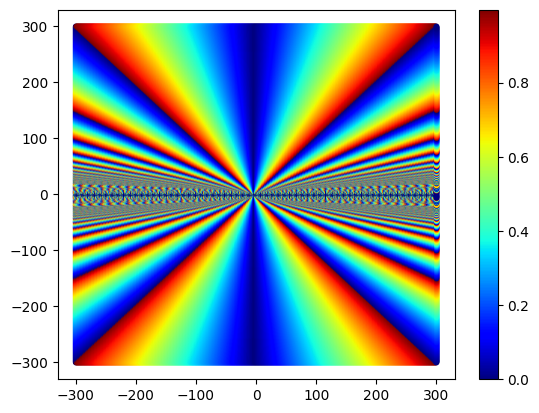

In [41]:
# Generate an integer lattice
n = 2
dim = 300
dimensions = [2*dim]*n
step_sizes = [1]*n
marker = [-dim]*n

# Write about that experience filtering zero with floats
# and not all zeros are getting filtered, only when I change to int
# they got filtered
#lattice = dg.generate_lattice(n, dimensions, step_sizes, marker)
#lattice = lattice[lattice[:, 1] != 0] # can't divide by zero
#lattice = lattice.astype(int)

# Generate a lattice and noise
lattice = generate_lattice(n, dimensions, step_sizes, marker)
lattice = lattice.astype(int)
lattice = lattice[lattice[:, 1] != 0] # can't divide by zero
plot(lattice, np.array([color_rational_point(pt) for pt in lattice]))

In [43]:
# Get two new lattices
lattice_proper = get_proper_points(lattice)
lattice_reduced = get_reduced_points(lattice)

# Color points
color_proper = np.array([color_rational_point(pt) for pt in get_proper_points(lattice)])
color_reduced = np.array([color_rational_point(pt) for pt in get_reduced_points(lattice)])

#plot(lattice_proper)
#plot(lattice_reduced)

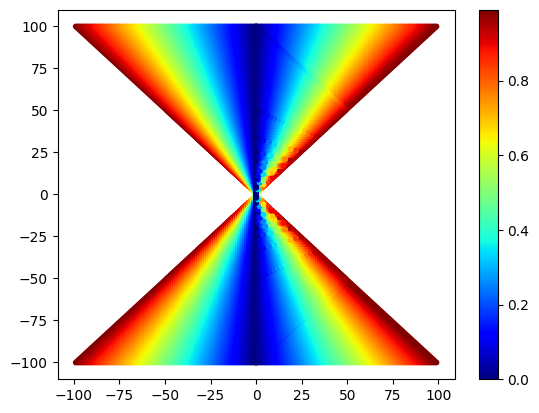

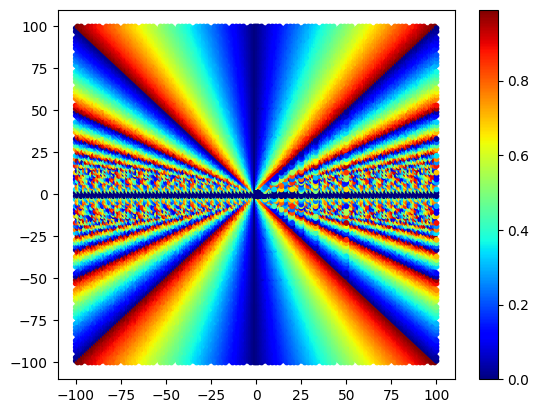

In [32]:
plot(lattice_proper, color_proper)
plot(lattice_reduced, color_reduced)

save_plot(lattice_proper, color_proper)

40200


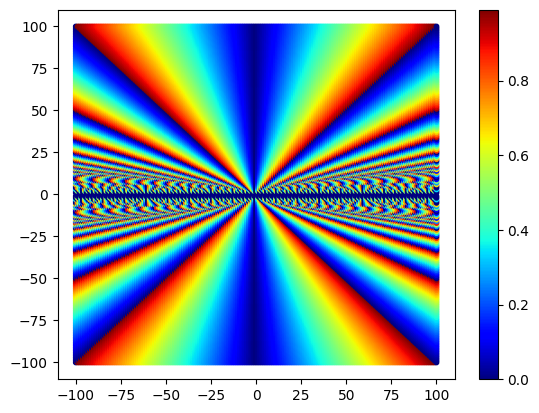

In [33]:
# Color all points in the original lattice according to the scheme

colors = np.array([color_rational_point(pt) for pt in lattice])
print(len(colors))
plot(lattice, colors)
save_plot(lattice, colors)

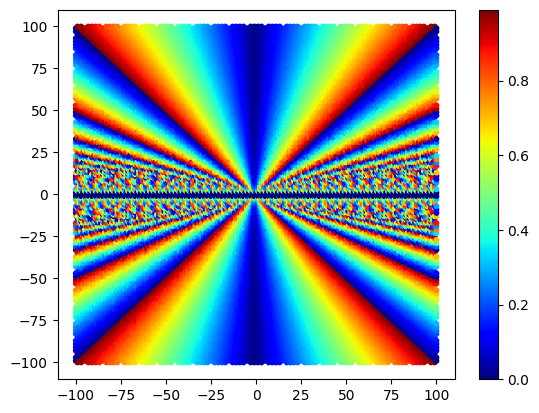

In [34]:
# Color only reduced points

lattice = filter_with_gcd(lattice)
#print(lattice)
colors = np.array([color_rational_point(pt) for pt in lattice])
plot(lattice, colors)
save_plot(lattice, colors)

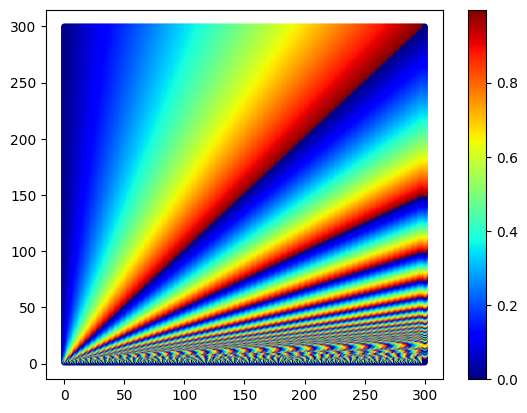

In [46]:
# Get the rational points (0, infinity)

lattice = lattice[(lattice[:, 0] >= 0) & (lattice[:, 1] > 0)]
colors = np.array([color_rational_point(pt) for pt in lattice])
plot(lattice, colors)
save_plot(lattice, colors)

In [47]:
# Split positive rational into proper and not fractions
lattice_small = lattice[lattice[:, 0] < lattice[:, 1]] # n/m with n < m
lattice_large = lattice[lattice[:, 0] > lattice[:, 1]] # n/m with n >= m
print(f"Number of proper points: {len(lattice_small)}")
print(f"Number of not-proper points: {len(lattice_large)}")

Number of proper points: 45150
Number of not-proper points: 44850


In [48]:
# Plot proper points
colors = np.array([color_rational_point(pt) for pt in lattice_small])
#plot(lattice_small)
#plot(lattice_small, colors)
save_plot(lattice_small, colors)

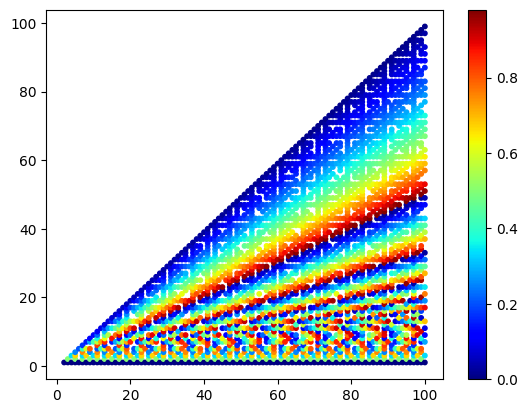

In [38]:
# Plot non-proper points
colors = np.array([color_rational_point(pt) for pt in lattice_large])
plot(lattice_large, colors)

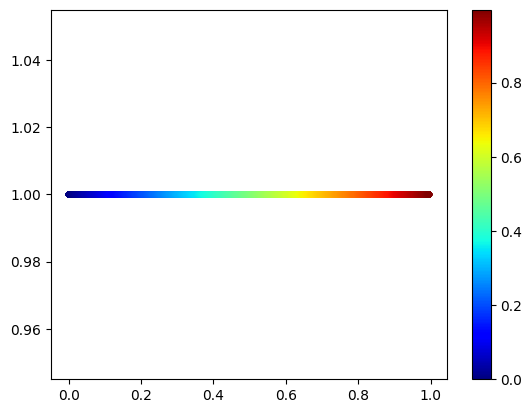

In [49]:
# Plot the unit interval
fractions_proper = lattice_small[:, 0] / lattice_small[:, 1]
ones_column = np.ones((fractions_proper.shape[0], 1))
fractions_reduced = np.hstack((fractions_proper.reshape((-1,1)), ones_column))
plot(fractions_reduced, np.array([color_rational_point(pt) for pt in lattice_small]))